**GETTING DATASET**
This dataset is a subset of the Food101 dataset from PyTorch.org.
Food101 starts 101 different classes of food and 1000 images per class(750 training, 250 testing).
This dataset starts with 3 classes of food and 10% images(75 training, 25 testing).
Why do this?
When starting out ML projects, it's important to try things on a small scale and then increase the scale when necessary. The whole point is to speed up the experiment.

In [1]:
import requests
import zipfile
from pathlib import Path
#setup path to a data folder
data_path=Path('data/')
image_path=data_path/'pizza_steak_sushi'
#if the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f'{image_path} directory already exists... skipping download')
else:
    print(f"{image_path} doesn't exist, creating one")
    image_path.mkdir(parents=True, exist_ok=True)
#download pizza, steak and sushi data
with open(data_path/'pizza_steak_sushi.zip', 'wb') as f:
    request=requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
    print('Downloading pizza, steak, sushi dataset....')
    f.write(request.content)
#unzip pizza, steak, sushi dataset
with zipfile.ZipFile(data_path/'pizza_steak_sushi.zip', 'r') as zip_ref:
    print('Unzipping pizza, steak, sushi dataset....')
    zip_ref.extractall(image_path)

data/pizza_steak_sushi directory already exists... skipping download
Unzipping pizza, steak, sushi dataset....


In [2]:
import os
def walk_through_dir(dir_path):
    #walks through dir_path returning its contents
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'


In [3]:
train_dir=image_path/'train'
test_dir=image_path/'test'
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Random image path:data/pizza_steak_sushi/test/pizza/2218680.jpg
Image class:pizza
Image height:512
Image width:512


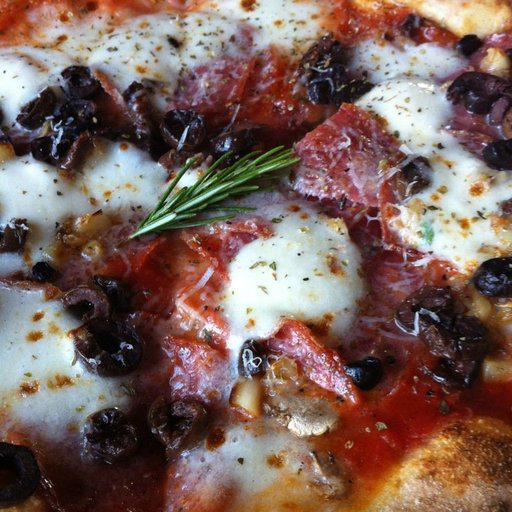

In [4]:
import random
from PIL import Image
#random.seed(1234)
image_path_list=list(image_path.glob('*/*/*.jpg')) #get all image paths
random_image_path=random.choice(image_path_list) #pick a random image
#get image class from path name(the image class is the name of the directory where the image is stored)
image_class=random_image_path.parent.stem
img=Image.open(random_image_path) #open image
#print metadata
print(f'Random image path:{random_image_path}')
print(f'Image class:{image_class}')
print(f'Image height:{img.height}')
print(f'Image width:{img.width}')
img

(-0.5, 511.5, 511.5, -0.5)

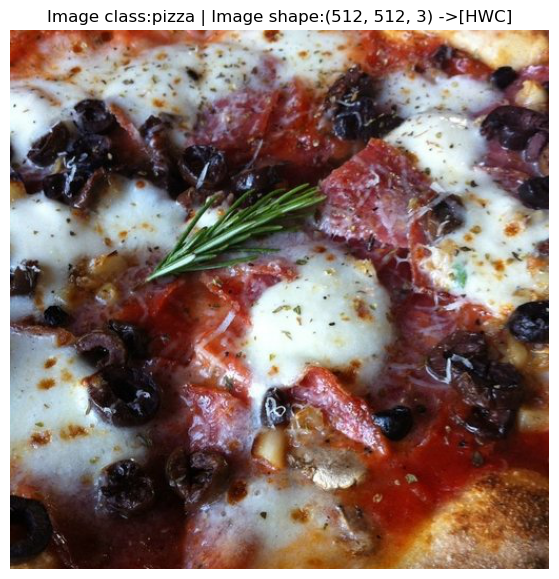

In [5]:
import torch
import matplotlib.pyplot as plt
import numpy as np
img_as_array=np.asarray(img) #turn the image into an array
plt.figure(figsize=(10,7))
plt.title('Data visualization')
plt.imshow(img_as_array)
plt.title(f'Image class:{image_class} | Image shape:{img_as_array.shape} ->[HWC]')
plt.axis('off')

In [6]:
img_as_array

array([[[173,  74,  33],
        [160,  61,  20],
        [149,  50,  11],
        ...,
        [127,  70,  51],
        [128,  70,  58],
        [125,  67,  56]],

       [[171,  74,  32],
        [167,  69,  30],
        [164,  66,  27],
        ...,
        [119,  61,  41],
        [120,  62,  48],
        [122,  64,  53]],

       [[178,  82,  44],
        [171,  75,  37],
        [171,  74,  39],
        ...,
        [112,  54,  32],
        [114,  57,  40],
        [122,  64,  52]],

       ...,

       [[ 95,  66,  36],
        [106,  77,  47],
        [113,  84,  54],
        ...,
        [ 69,  45,  33],
        [ 72,  48,  36],
        [ 73,  49,  37]],

       [[120,  90,  54],
        [133, 100,  65],
        [136, 103,  68],
        ...,
        [ 71,  47,  37],
        [ 71,  47,  35],
        [ 70,  46,  34]],

       [[126,  94,  55],
        [136, 104,  65],
        [137, 105,  66],
        ...,
        [ 71,  49,  38],
        [ 80,  56,  46],
        [ 85,  61,  49]]

In [7]:
import torch
from torch import nn
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [8]:
data_transform=transforms.Compose([
    #resize our image to 64x64
    transforms.Resize(size=(64,64)), 
    #flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), 
    #turn the image into torch.Tensor
    transforms.ToTensor()
]) #nn.Sequential can also be used

In [9]:
data_transform(img)

tensor([[[0.6078, 0.7412, 0.8510,  ..., 0.5412, 0.5843, 0.6549],
         [0.7961, 0.8980, 0.9137,  ..., 0.5569, 0.5843, 0.6235],
         [0.8000, 0.9137, 0.9333,  ..., 0.6078, 0.5608, 0.6039],
         ...,
         [0.4706, 0.4902, 0.5373,  ..., 0.0588, 0.0745, 0.0863],
         [0.3686, 0.3804, 0.4549,  ..., 0.1137, 0.0941, 0.0902],
         [0.2431, 0.2902, 0.4039,  ..., 0.3020, 0.3098, 0.2667]],

        [[0.3843, 0.4902, 0.6431,  ..., 0.1569, 0.2235, 0.2941],
         [0.6118, 0.7412, 0.7765,  ..., 0.1608, 0.1765, 0.2235],
         [0.5961, 0.8078, 0.8627,  ..., 0.2118, 0.1333, 0.1569],
         ...,
         [0.3490, 0.3686, 0.3922,  ..., 0.0471, 0.0588, 0.0667],
         [0.2588, 0.2706, 0.3333,  ..., 0.0706, 0.0667, 0.0667],
         [0.1529, 0.1961, 0.2902,  ..., 0.1804, 0.1961, 0.1765]],

        [[0.2235, 0.2745, 0.3922,  ..., 0.0392, 0.1059, 0.1725],
         [0.3843, 0.5059, 0.5412,  ..., 0.0549, 0.0627, 0.0980],
         [0.4078, 0.6353, 0.6784,  ..., 0.0863, 0.0353, 0.

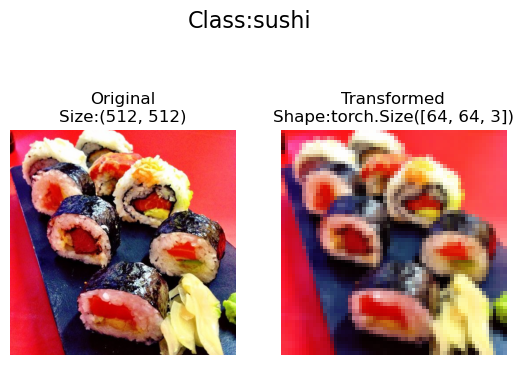

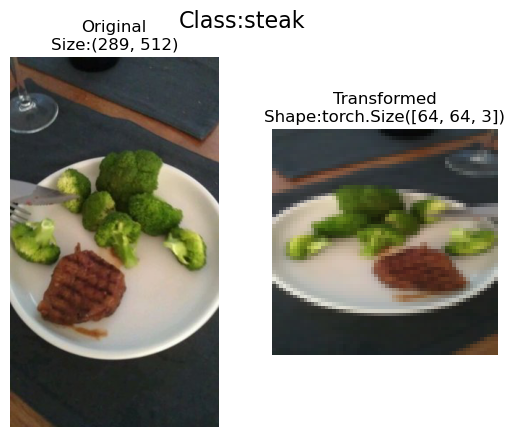

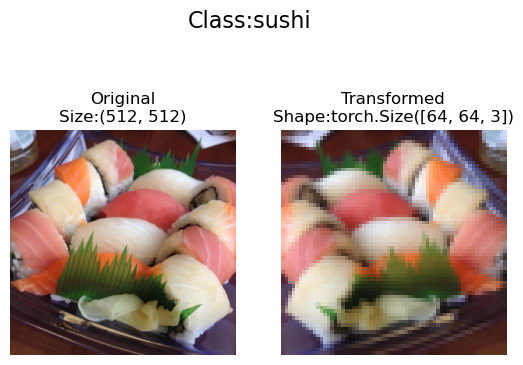

In [10]:
def plot_transformed_image(image_paths: list, transform, n=3, seed=None):
    #select random images from a path of images and load/transforms them then plots the original vs the transformed version
    if seed:
        random.seed(seed)
    random_image_paths=random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax=plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f'Original\nSize:{f.size}')
            ax[0].axis('off')
            
            #transform and plot target image
            transformed_image=transform(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f'Transformed\nShape:{transformed_image.shape}')
            ax[1].axis('off')
            fig.suptitle(f'Class:{image_path.parent.stem}', fontsize=16)
plot_transformed_image(image_paths=image_path_list, transform=data_transform, n=3, seed=None)

In [11]:
#loading image data using ImageFolder, use ImageFolder to create dataset(s)
from torchvision import datasets
train_data=datasets.ImageFolder(root=train_dir, transform=data_transform, #a transform for the data
                                target_transform=None) #a transform for the label/target
test_data=datasets.ImageFolder(root=test_dir, transform=data_transform)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [12]:
class_names=train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [13]:
class_dict=train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [14]:
img, label=train_data[0][0], train_data[0][1]
print(f'Image tensor:\n{img}')
print(f'Image shape:{img.shape}')
print(f'Image datatype:{img.dtype}')
print(f'Image label:{label}')
print(f'Label datatype:{type(label)}')

Image tensor:
tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.01

Original shape:torch.Size([3, 64, 64])
Permuted shape:torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

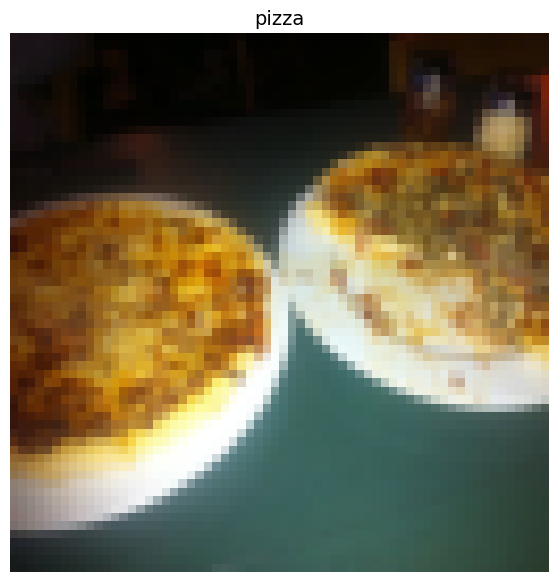

In [15]:
img_permute=img.permute(1,2,0) #rearrange the order dimensions
#print the different shapes
print(f'Original shape:{img.shape}')
print(f'Permuted shape:{img_permute.shape}')
#plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis('off')
plt.title(class_names[label], fontsize=14)

In [16]:
from torch.utils.data import DataLoader
BATCH_SIZE=1
train_dataloader=DataLoader(dataset=train_data, batch_size=BATCH_SIZE, num_workers=1, shuffle=True)
test_dataloader=DataLoader(dataset=test_data, batch_size=BATCH_SIZE, num_workers=1, shuffle=False)
print(f'DataLoaders: {train_dataloader, test_dataloader}')

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x14c1b5dd0>, <torch.utils.data.dataloader.DataLoader object at 0x14bdd2c10>)


In [17]:
print(f'Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}')
print(f'Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}')

Length of train dataloader: 225 batches of 1
Length of test dataloader: 75 batches of 1


In [18]:
train_features_batch, train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

In [19]:
#creating custom dataset class
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [20]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [21]:
#creating a helper function to get class names
target_dir=train_dir
print(f'Target Dir:{target_dir}')
class_names_found=sorted([entry.name for entry in list(os.scandir(target_dir))])
class_names_found

Target Dir:data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [22]:
list(os.scandir(target_dir))

[<DirEntry 'steak'>, <DirEntry 'sushi'>, <DirEntry 'pizza'>]

In [23]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    '''finds the class folder names in a target directory
    get the class names by scanning the target directory'''
    classes=sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    
    #raise an error if class names couldn't be found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}, please check file structure!")

    #create a dictionary of index labels(computers prefer numbers rather than strings as labels)
    class_to_idx={class_name: i for i, class_name in enumerate(classes)}
    return classes, class_to_idx

In [24]:
find_classes(target_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [25]:
#write a custom dataset class
from torch.utils.data import Dataset

#subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    #initialize our custom dataset
    def __init__(self, targ_dir: str, transform: None):
        #create class attributes
        #get all of the image paths
        self.paths=list(pathlib.Path(targ_dir).glob('*/*.jpg'))
        #setup transform
        self.transform=transform
        #create classes and class_to_idx attributes
        self.classes, self.class_to_idx=find_classes(targ_dir)
    
    #create a function to load images
    def load_image(self, index: int) ->Image.Image:
        #opens an image via a path and returns it
        image_path=self.paths[index]
        return Image.open(image_path)
    
    #overwrite __len__()
    def __len__(self) ->int:
        #returns the total no of samples
        return len(self.paths)
    
    #overwrite __getitem__() method to return a particular sample
    def __getitem__(self, index:int)->Tuple[torch.Tensor, int]:
        #returns one sample of data, data and label(X, y)
        img=self.load_image(index)
        class_name=self.paths[index].parent.name #expects path in format: data_folder/class_name/image.jpg
        class_idx=self.class_to_idx[class_name]
        
        #transform if necesssary
        if self.transform:
            return self.transform(img), class_idx #return data, label(X, y)
        else:
            return img, class_idx #return untransformed image and label

In [26]:
#create a transform
from torchvision import transforms
train_transforms=transforms.Compose([transforms.Resize(size=(64,64)), 
                                     transforms.RandomHorizontalFlip(p=0.5), 
                                     transforms.ToTensor()])
test_transforms=transforms.Compose([transforms.Resize(size=(64,64)), transforms.ToTensor()])

In [27]:
train_data_custom=ImageFolderCustom(targ_dir=train_dir, transform=train_transforms)
test_data_custom=ImageFolderCustom(targ_dir=test_dir, transform=test_transforms)

In [28]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x14c27c750>,
 <__main__.ImageFolderCustom at 0x13e8dbf50>)

In [29]:
len(train_data), len(train_data_custom)

(225, 225)

In [30]:
len(test_data), len(test_data_custom)

(75, 75)

In [31]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [32]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [33]:
train_data_custom.paths

[PosixPath('data/pizza_steak_sushi/train/steak/239025.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1598345.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3074367.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2979061.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/914570.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/167069.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/231296.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2324994.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2603058.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1961025.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1615395.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2606444.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/355715.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2163079.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1736968.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2878151.jpg'),
 PosixPath('d

In [34]:
train_data_custom.transform

Compose(
    Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
)

In [35]:
#check for equality between original ImageFolder Dataset and ImageFolderCustom Dataset
print(train_data_custom.classes==train_data.classes)
print(test_data_custom.classes==test_data.classes)

True
True


In [36]:
#create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset, classes: List[str]=None, n:int=10, 
                          display_shape:bool=True, seed:int=None):
    #adjust display if n is too high
    if n>10:
        display_shape=False
        print(f"For display, purposes, n shouldn't be larger than 10, setting to 10 and removing shape display")
        
    #set the seed
    if seed:
        random.seed(seed)
        
    #get random sample indexes
    random_samples_idx=random.sample(range(len(dataset)), k=n)
    
    #setup plot
    plt.figure(figsize=(16,8))
    
    #loop through random indexes and plot then with matplotlib
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label=dataset[targ_sample][0], dataset[targ_sample][1]
        
        #adjust tensor dimensions for plotting
        targ_image_adjust=targ_image.permute(1,2,0)
        
        #plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis('off')
        if classes:
            title=f'Class: {classes[targ_label]}'
            if display_shape:
                title=title+f'\nshape:{targ_image_adjust.shape}'
        plt.title(title)

In [37]:
random.sample(range(len(train_data_custom)), k=10)

[57, 139, 179, 33, 122, 210, 216, 104, 223, 56]

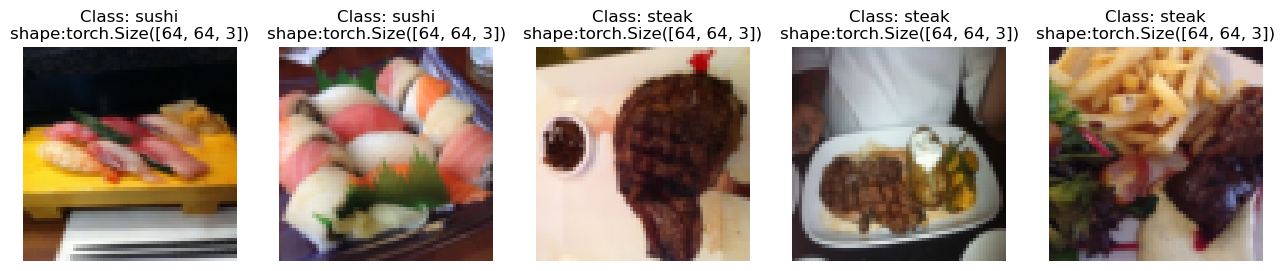

In [38]:
#display random images from the ImageFolder created Dataset
display_random_images(dataset=train_data_custom, classes=class_names, n=5, seed=None)

In [39]:
#turn custom loaded images into dataloaders
from torch.utils.data import DataLoader
BATCH_SIZE=32
NUM_WORKERS=0 #os.cpu_count()
train_dataloader_custom=DataLoader(dataset=train_data_custom, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, shuffle=True)
test_dataloader_custom=DataLoader(dataset=test_data_custom, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, shuffle=False)
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x14c3f2150>,
 <torch.utils.data.dataloader.DataLoader at 0x14c1ea310>)

In [40]:
#get image and label from custom dataloader
img_custom, label_custom=next(iter(train_dataloader_custom))
img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [41]:
#data augmentation(trivialaugment)(transforming the data)
from torchvision import transforms
train_transform=transforms.Compose([transforms.Resize(size=(224,224)), 
                                    transforms.TrivialAugmentWide(num_magnitude_bins=11), transforms.ToTensor()])
test_transform=transforms.Compose([transforms.Resize(size=(224,224)), transforms.ToTensor()])

In [42]:
image_path_list=list(image_path.glob('*/*/*.jpg'))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/test/steak/296375.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/673127.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/894825.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1868005.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/27415.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1016217.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1285886.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/502076.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/3424937.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/690177.jpg')]

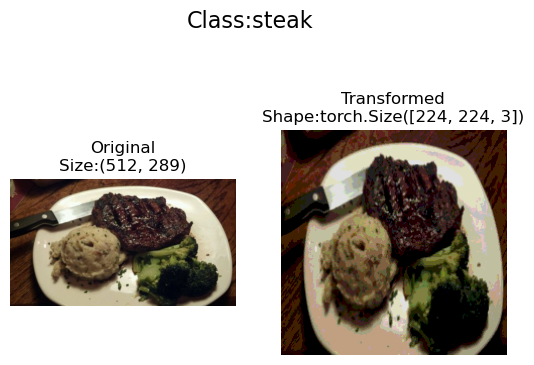

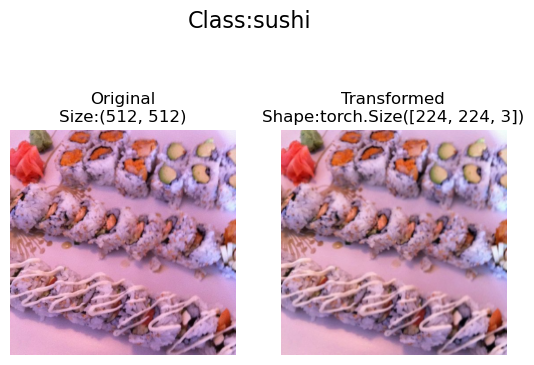

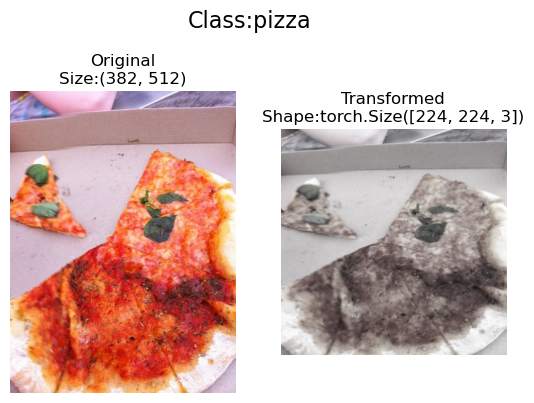

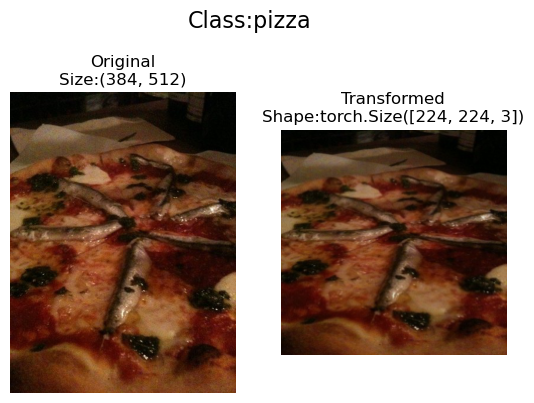

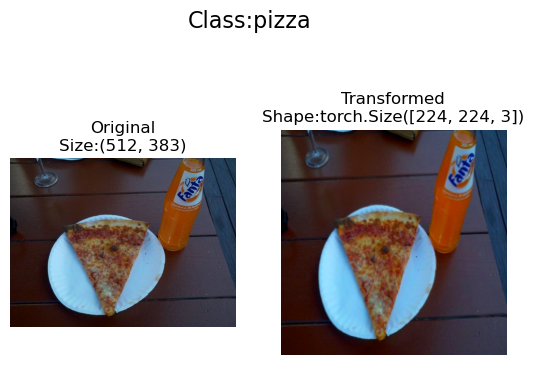

In [43]:
plot_transformed_image(image_paths=image_path_list, transform=train_transform, n=5, seed=None)

In [44]:
#creating simple transform and loading data for model 0
simple_transform=transforms.Compose([transforms.Resize(size=(64,64)), transforms.ToTensor()])

In [45]:
from torchvision import datasets
train_data_simple=datasets.ImageFolder(root=train_dir, transform=data_transform)
test_data_simple=datasets.ImageFolder(root=test_dir, transform=data_transform)
import os
from torch.utils.data import DataLoader
BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()
train_dataloader_simple=DataLoader(dataset=train_data_simple, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, shuffle=True)
test_dataloader_simple=DataLoader(dataset=test_data_simple, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, shuffle=False)
train_dataloader_simple, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x109a59bd0>,
 <torch.utils.data.dataloader.DataLoader at 0x14c397150>)

In [46]:
NUM_WORKERS

8

**In VGG in the classifier part the in_features are not as same as out_channels of conv_block_2, coz the shapes 
aren't same, so we've to troubleshoot it, load the class into a model(e.g.:model_0=TinyVGG(...)), and print the model, then iter through the dataloader into the image batches, then load the image batch into the model to get the different shapes, take the largest no. then divide it by hidden_units(e.g.:10), then root the remainder, then multiply the no. twice with the in_features.**

In [109]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.conv_block_1=nn.Sequential(nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, 
                                                 kernel_size=3, stride=1, padding=0), 
                                       nn.ReLU(), 
                                       nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, 
                                                 kernel_size=3, stride=1, padding=0), 
                                       nn.ReLU(), 
                                       nn.MaxPool2d(kernel_size=2, stride=2))
        self.conv_block_2=nn.Sequential(nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, 
                                                 kernel_size=3, stride=1, padding=0), 
                                       nn.ReLU(), 
                                       nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, 
                                                 kernel_size=3, stride=1, padding=0), 
                                       nn.ReLU(), 
                                       nn.MaxPool2d(kernel_size=2, stride=2))
        self.classifier=nn.Sequential(nn.Flatten(), 
                                      nn.Linear(in_features=hidden_units*13*13, #there's a trick daniel will explain
                                                out_features=output_shape))
    def forward(self,x):
        x=self.conv_block_1(x)
        #print(x.shape)
        x=self.conv_block_2(x)
        #print(x.shape)
        x=self.classifier(x)
        return x
        #return self.classifier(self.conv_block_2(self.conv_block_1(x))) #benefits from operator fusion

In [110]:
torch.manual_seed(1234)
model_0=TinyVGG(input_shape=3, hidden_units=20, output_shape=len(class_names))
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3380, out_features=3, bias=True)
  )
)

In [111]:
img_batch, label_batch=next(iter(train_dataloader_simple))
img_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [112]:
model_0(img_batch)

tensor([[-3.4111e-02,  3.4697e-02, -3.0463e-03],
        [-3.7997e-02,  3.6327e-02, -6.7532e-03],
        [-3.2682e-02,  3.6200e-02, -9.6888e-04],
        [-3.2467e-02,  3.6559e-02,  9.0934e-06],
        [-3.2213e-02,  2.8002e-02, -3.8233e-03],
        [-3.1471e-02,  3.3103e-02, -4.4417e-03],
        [-3.5039e-02,  3.4282e-02, -3.4224e-03],
        [-3.5078e-02,  3.0940e-02, -6.6846e-03],
        [-3.5531e-02,  3.5589e-02, -1.2776e-03],
        [-4.4574e-02,  3.6316e-02, -4.2201e-03],
        [-3.9960e-02,  3.7094e-02,  3.8384e-04],
        [-3.2363e-02,  3.1049e-02, -7.6146e-03],
        [-3.1866e-02,  3.4148e-02, -5.5932e-03],
        [-3.0407e-02,  3.3162e-02, -2.3515e-03],
        [-3.4423e-02,  3.9408e-02, -6.5432e-03],
        [-3.2029e-02,  3.6140e-02, -5.5849e-03],
        [-3.5764e-02,  2.4083e-02, -3.9230e-03],
        [-3.5182e-02,  3.4558e-02, -6.3246e-03],
        [-3.8179e-02,  3.7356e-02, -4.7269e-03],
        [-3.1694e-02,  3.7124e-02, -3.5880e-03],
        [-3.3443e-02

In [113]:
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo
    
from torchinfo import summary
summary(model_0, input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 20, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 20, 62, 62]           560
│    └─ReLU: 2-2                         [1, 20, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 20, 60, 60]           3,620
│    └─ReLU: 2-4                         [1, 20, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 20, 30, 30]           --
├─Sequential: 1-2                        [1, 20, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 20, 28, 28]           3,620
│    └─ReLU: 2-7                         [1, 20, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 20, 26, 26]           3,620
│    └─ReLU: 2-9                         [1, 20, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 20, 13, 13]           --
├─Seq

In [114]:
from timeit import default_timer as timer
def print_training_time(start: float, end: float, device: torch.device=None):
    total_time=end-start
    print(f'Training time on device: {device}:{total_time:.3f} seconds')
    return total_time

In [115]:
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model_0.parameters(),lr=0.001)

In [116]:
def train_step(model: torch.nn.Module, dataloader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    model.train()
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [117]:
def test_step(model: torch.nn.Module, dataloader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module):
    model.eval() 
    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            test_pred_logits = model(X)
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [118]:
from tqdm.auto import tqdm
def train(model: torch.nn.Module, train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, optimizer: torch.optim.Optimizer, 
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(), epochs: int = 5):
    results = {"train_loss": [], "train_acc": [], "test_loss": [], "test_acc": []}
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model, dataloader=train_dataloader, loss_fn=loss_fn, 
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model, dataloader=test_dataloader, loss_fn=loss_fn)
        print(f"Epoch: {epoch+1} | train_loss: {train_loss:.4f} | train_acc: {train_acc:.4f} | test_loss: {test_loss:.4f} | test_acc: {test_acc:.4f}")
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)
    return results

In [119]:
torch.manual_seed(1234)
NUM_EPOCHS = 5
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, output_shape=len(train_data.classes))
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)
from timeit import default_timer as timer 
start_time = timer()
model_0_results = train(model=model_0, train_dataloader=train_dataloader_simple, 
                        test_dataloader=test_dataloader_simple, optimizer=optimizer, loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1028 | train_acc: 0.2773 | test_loss: 1.1298 | test_acc: 0.2083
Epoch: 2 | train_loss: 1.1044 | train_acc: 0.2969 | test_loss: 1.0999 | test_acc: 0.2386
Epoch: 3 | train_loss: 1.0638 | train_acc: 0.4375 | test_loss: 1.0191 | test_acc: 0.5625
Epoch: 4 | train_loss: 1.0795 | train_acc: 0.3477 | test_loss: 1.0208 | test_acc: 0.6250
Epoch: 5 | train_loss: 1.0343 | train_acc: 0.4922 | test_loss: 1.0571 | test_acc: 0.5038
Total training time: 303.803 seconds


In [58]:
model_0_results

{'train_loss': [1.102825254201889,
  1.1044030040502548,
  1.0638443380594254,
  1.0795407593250275,
  1.0343377217650414],
 'train_acc': [0.27734375, 0.296875, 0.4375, 0.34765625, 0.4921875],
 'test_loss': [1.1296778917312622,
  1.1003094514211018,
  1.0214065909385681,
  1.0210452278455098,
  1.0610268115997314],
 'test_acc': [0.19791666666666666,
  0.20833333333333334,
  0.5625,
  0.6145833333333334,
  0.5142045454545454]}

In [59]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [60]:
def plot_curve_loss(results:Dict[str, list[float]]):
    '''plot training curves of a results dictionary'''
    loss=results['train_loss']
    test_loss=results['test_loss']
    accuracy=results['train_acc']
    test_accuracy=results['test_acc']
    epochs=range(len(results['train_loss']))
    plt.figure(figsize=(15,7))
    
    #plot the loss
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    
    #plot the accuracy
    plt.subplot(1,2,1)
    plt.plot(epochs, accuracy, label='train_acc')
    plt.plot(epochs, test_accuracy, label='test_acc')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

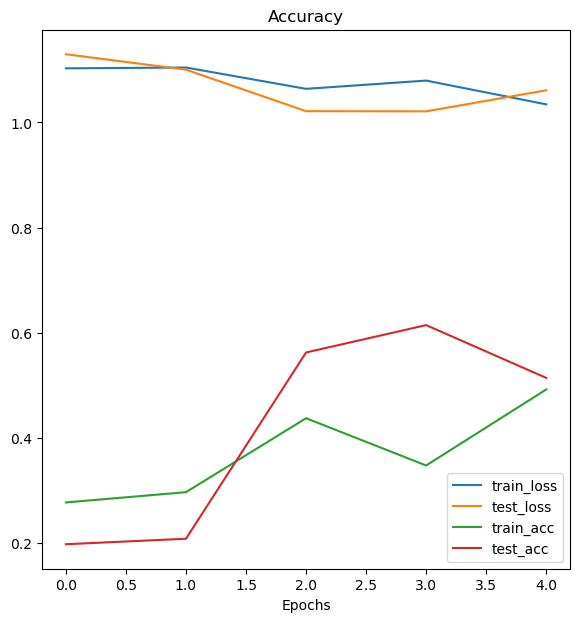

In [61]:
plot_curve_loss(model_0_results)

In [62]:
#create training transform with TrivialAugmentation
from torchvision import transforms
train_transform_trivial=transforms.Compose([transforms.Resize(size=(64,64)), 
                                            transforms.TrivialAugmentWide(num_magnitude_bins=31), 
                                            transforms.ToTensor()])
test_transform_simple=transforms.Compose([transforms.Resize(size=(64,64)), transforms.ToTensor()])

In [63]:
#turn image folders into datsets
from torchvision import datasets
train_data_aug=datasets.ImageFolder(root=train_dir, transform=train_transform_trivial)
test_data_simple=datasets.ImageFolder(root=test_dir, transform=test_transform_simple)

In [64]:
torch.manual_seed(1234)
import os
from torch.utils.data import DataLoader
BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()
train_dataloader_aug=DataLoader(dataset=train_data_aug, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, shuffle=True)
test_dataloader_simple=DataLoader(dataset=test_data_simple, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, shuffle=False)
train_dataloader_aug, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x14c825710>,
 <torch.utils.data.dataloader.DataLoader at 0x14c5bab10>)

In [91]:
'''class TinyVGG_1(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.conv_block_1=nn.Sequential(nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, 
                                                 kernel_size=3, stride=1, padding=0), 
                                       nn.ReLU(), 
                                       nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, 
                                                 kernel_size=3, stride=1, padding=0), 
                                       nn.ReLU(), 
                                       nn.MaxPool2d(kernel_size=2, stride=2))
        self.conv_block_2=nn.Sequential(nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, 
                                                 kernel_size=3, stride=1, padding=0), 
                                       nn.ReLU(), 
                                       nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, 
                                                 kernel_size=3, stride=1, padding=0), 
                                       nn.ReLU(), 
                                       nn.MaxPool2d(kernel_size=2, stride=2))
        self.classifier=nn.Sequential(nn.Flatten(), 
                                      nn.Linear(in_features=hidden_units*13*13, #there's a trick daniel will explain
                                                out_features=output_shape))
    def forward(self,x):
        x=self.conv_block_1(x)
        #print(x.shape)
        x=self.conv_block_2(x)
        #print(x.shape)
        x=self.classifier(x)
        return x
        return self.classifier(self.conv_block_2(self.conv_block_1(x))) #benefits from operator fusion'''

class TinyVGG_1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, 
                                                 kernel_size=3, stride=1, padding=0), 
                                       nn.ReLU(), 
                                       nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, 
                                                 kernel_size=3, stride=1, padding=0), 
                                       nn.ReLU(), 
                                       nn.MaxPool2d(kernel_size=2, stride=2))
        self.conv_block_2 = nn.Sequential(nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, 
                                                 kernel_size=3, stride=1, padding=0), 
                                       nn.ReLU(), 
                                       nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, 
                                                 kernel_size=3, stride=1, padding=0), 
                                       nn.ReLU(), 
                                       nn.MaxPool2d(kernel_size=2, stride=2))
        self.conv_block_3 = nn.Sequential(nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, 
                                                 kernel_size=3, stride=1, padding=0), 
                                       nn.ReLU(), 
                                       nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, 
                                                 kernel_size=3, stride=1, padding=0), 
                                       nn.ReLU(), 
                                       nn.MaxPool2d(kernel_size=2, stride=2))
        
        # Calculate in_features automatically
        with torch.no_grad():
            dummy_input = torch.randn(1,3,64,64)  # Adjust input size
            out = self.conv_block_1(dummy_input)
            out = self.conv_block_2(out)
            out = self.conv_block_3(out)
            in_features = out.numel()  # Flattened size
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=in_features, out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.conv_block_3(x)
        x = self.classifier(x)
        return x


In [92]:
torch.manual_seed(1234)
model_1=TinyVGG_1(input_shape=3, hidden_units=20, output_shape=len(train_data_aug.classes))
model_1

TinyVGG_1(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=320, out_features=3, bias=True)
  )
)

In [93]:
img_batch, label_batch=next(iter(train_dataloader_aug))
img_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [94]:
len(train_data_aug.classes)

3

In [95]:
model_1(img_batch)

tensor([[-0.0113, -0.0370,  0.0273],
        [-0.0102, -0.0379,  0.0270],
        [-0.0119, -0.0364,  0.0256],
        [-0.0111, -0.0365,  0.0270],
        [-0.0112, -0.0372,  0.0258],
        [-0.0114, -0.0368,  0.0261],
        [-0.0107, -0.0372,  0.0278],
        [-0.0106, -0.0366,  0.0259],
        [-0.0111, -0.0373,  0.0263],
        [-0.0105, -0.0375,  0.0251],
        [-0.0110, -0.0371,  0.0268],
        [-0.0114, -0.0369,  0.0259],
        [-0.0121, -0.0354,  0.0260],
        [-0.0107, -0.0365,  0.0268],
        [-0.0114, -0.0362,  0.0259],
        [-0.0106, -0.0366,  0.0268],
        [-0.0110, -0.0368,  0.0264],
        [-0.0114, -0.0368,  0.0270],
        [-0.0113, -0.0370,  0.0259],
        [-0.0118, -0.0378,  0.0256],
        [-0.0119, -0.0369,  0.0248],
        [-0.0114, -0.0366,  0.0264],
        [-0.0112, -0.0373,  0.0268],
        [-0.0113, -0.0358,  0.0256],
        [-0.0107, -0.0372,  0.0265],
        [-0.0096, -0.0375,  0.0260],
        [-0.0117, -0.0383,  0.0266],
 

In [96]:
torch.manual_seed(1234)
NUM_EPOCHS = 10
model_1 = TinyVGG_1(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=20, output_shape=len(train_data.classes))
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)
from timeit import default_timer as timer 
start_time = timer()
model_1_results = train(model=model_1, train_dataloader=train_dataloader_aug, 
                        test_dataloader=test_dataloader_simple, optimizer=optimizer, loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0999 | train_acc: 0.2812 | test_loss: 1.0875 | test_acc: 0.5417
Epoch: 2 | train_loss: 1.0952 | train_acc: 0.4023 | test_loss: 1.0875 | test_acc: 0.5417
Epoch: 3 | train_loss: 1.1028 | train_acc: 0.2812 | test_loss: 1.0875 | test_acc: 0.5417
Epoch: 4 | train_loss: 1.1028 | train_acc: 0.2812 | test_loss: 1.0875 | test_acc: 0.5417
Epoch: 5 | train_loss: 1.1031 | train_acc: 0.2812 | test_loss: 1.0875 | test_acc: 0.5417
Epoch: 6 | train_loss: 1.0953 | train_acc: 0.4023 | test_loss: 1.0875 | test_acc: 0.5417
Epoch: 7 | train_loss: 1.0953 | train_acc: 0.4023 | test_loss: 1.0875 | test_acc: 0.5417
Epoch: 8 | train_loss: 1.1029 | train_acc: 0.2812 | test_loss: 1.0875 | test_acc: 0.5417
Epoch: 9 | train_loss: 1.1029 | train_acc: 0.2812 | test_loss: 1.0875 | test_acc: 0.5417
Epoch: 10 | train_loss: 1.1029 | train_acc: 0.2812 | test_loss: 1.0875 | test_acc: 0.5417
Total training time: 612.740 seconds


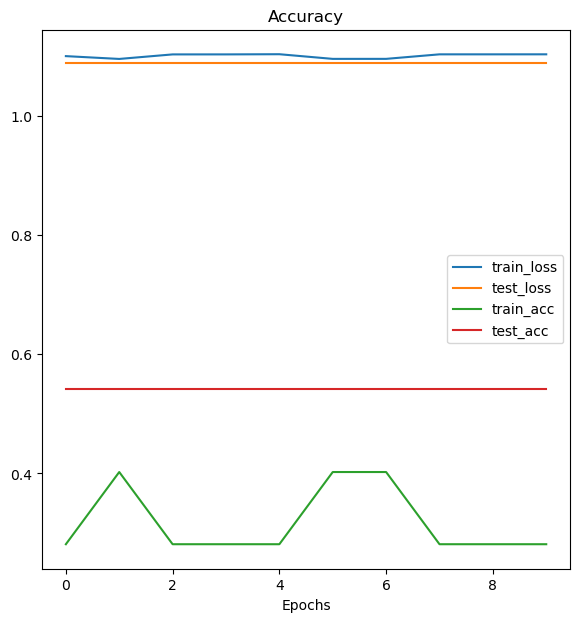

In [120]:
plot_curve_loss(model_1_results)

In [ ]:
import pandas as pd
model_0_df=pd.DataFramea(model_0_results)
model_1_df=pd.DataFramea(model_1_results)